In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42641_R')

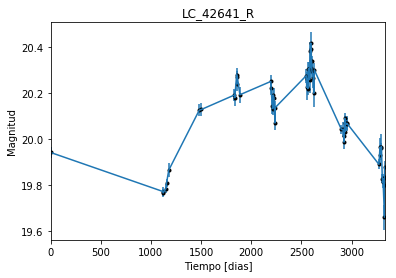

In [2]:
data = np.genfromtxt('LC_42641_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42641_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

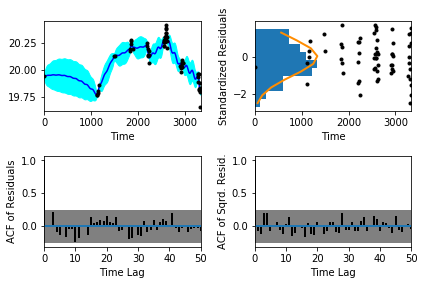

In [5]:
sample.assess_fit()

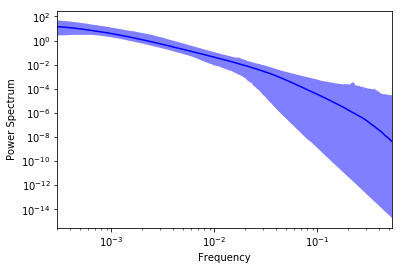

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42641_R')

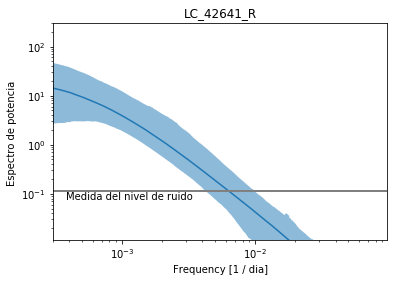

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42641_R')

Text(0.5,1,'Prediccion , valor esperado LC_42641_R')

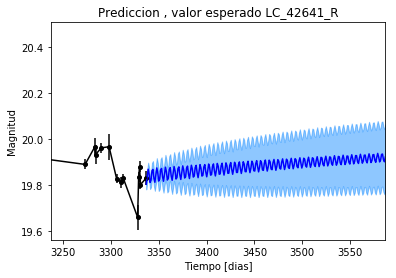

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42641_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42641_R')

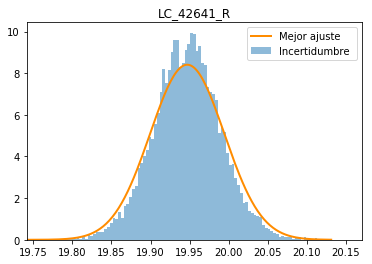

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42641_R')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_R')

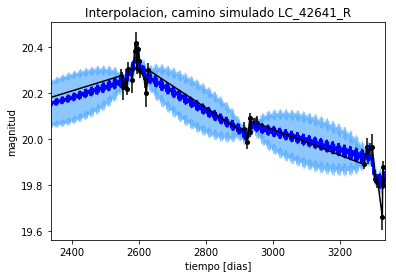

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_R')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_R')

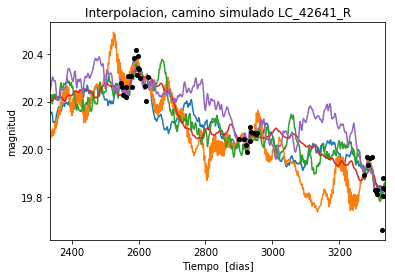

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 246.104235418
Median: 0.0301423886266
Standard deviation: 0.223568876347
68% credibility interval: [ 0.00216198  0.27872165]
95% credibility interval: [  3.70684112e-04   8.67866456e-01]
99% credibility interval: [  3.14559494e-04   1.03671580e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 598.495749645
Median: 0.0102595419727
Standard deviation: 0.10356665224
68% credibility interval: [ 0.00060796  0.07755373]
95% credibility interval: [  3.21083534e-04   3.34092964e-01]
99% credibility interval: [  3.02437235e-04   7.27206962e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 252.673997294
Median: 0.0661319246344
St

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 986.747996278
Median: 119.51247582
Standard deviation: 1.82214918711
68% credibility interval: [ 117.45271541  120.72519083]
95% credibility interval: [ 114.61764076  121.40710153]
99% credibility interval: [ 112.13943041  122.67004031]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 604.301939338
Median: 1.3170787668
Standard deviation: 2.69273341919
68% credibility interval: [ 0.18835452  5.46531096]
95% credibility interval: [ 0.03463048  9.09189065]
99% credibility interval: [  0.01387918  11.47694682]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 936.421100036
Median: 3.3207990511
Standard deviation: 11.7138549654
68% credibility interval: [  0.16629007  18.18763152]
95% credibility interval: [  1.25038100e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2391.72086926
Median: 8.37715357898e-34
Standard deviation: 2.70579183952e+86
68% credibility interval: [  8.88117220e-86   1.16442473e-06]
95% credibility interval: [  2.28239416e-149   1.34920065e+050]
99% credibility interval: [  8.87589600e-152   8.08803860e+073]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2182.86902995
Median: 20.0346527967
Standard deviation: 0.08484803046
68% credibility interval: [ 19.95193892  20.10607972]
95% credibility interval: [ 19.84223398  20.18659642]
99% credibility interval: [ 19.77334635  20.2553146 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 255.026213117
Median: 0.0800733728741
Standard deviation: 0.291844743141
68% credibility interval: [ 0.          0.58113812]
95% credibility interval: [ 0.          0.95756399]
99% credibility interval: [ 0.          1.04369827]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 255.026213117
Median: 0.0800733728741
Standard deviation: 0.291844743141
68% credibility interval: [ 0.          0.58113812]
95% credibility interval: [ 0.          0.95756399]
99% credibility interval: [ 0.          1.04369827]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2212.8767761
Median: 0.0
Standard deviation: 0.000277237354209
68% cre

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 986.747996278
Median: 119.51247582
Standard deviation: 1.82214918711
68% credibility interval: [ 117.45271541  120.72519083]
95% credibility interval: [ 114.61764076  121.40710153]
99% credibility interval: [ 112.13943041  122.67004031]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1293.51818811
Median: 0.0310750067406
Standard deviation: 0.0215488099454
68% credibility interval: [ 0.02037884  0.04934656]
95% credibility interval: [ 0.01452898  0.08806265]
99% credibility interval: [ 0.01138382  0.13977145]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1044.50041978
Median: 1.15241717816
Standard deviation: 0.200681836755
68% credibility interval: [ 0.97437428  1.37247484]
95% credibility interval: [ 0.83890971  1.61058381]
99% credibility interval: [ 0.76084479  1.8109951 ]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 729.38124265
Median: 0.00727676918712
Standard deviation: 0.30527858359
68% credibility interval: [ 0.00011012  0.09299572]
95% credibility interval: [  8.87315323e-54   9.00358841e-01]
99% credibility interval: [  4.15620341e-78   2.48394555e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 246.104235418
Median: (-0.189390213342+0j)
Standard deviation: 2.30992654985
68% credibility interval: [-1.75125979-1.38883062j -0.01358414-0.14696485j]
95% credibility interval: [ -5.45296576e+00-3.1173472j   -2.32907697e-03-3.26703755j]
99% credibility interval: [ -6.51387749e+00+0.j          -1.97643559e-03-0.10971888j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 598.495749645
Median: (-0.0644626033812+0j)
Standard deviation: 1.94575352512
68% credibility interval: [-0.48728449+1.14019607j -0.00381991+0.30435914j]
95% credibility interval: [ -2.09916800e+00+3.40568162j  -2.01742734e-03+0.j        ]
99% credibility interval: [ -4.56917610e+00+0.02454172j  -1.90026919e-03+0.j        ]
Posterior summary for paramet